# Riparian Connectivity - Stats testing

In [1]:
# Imports
# -------

import geopandas as gpd
import os
import pandas as pd
import matplotlib.pyplot as plt

import rioxarray as rxr
import numpy as np
import xarray as xr

os.getcwd()

'/Users/johnofoster/Documents/GitHub/riparian-connectivity/testing'

In [2]:
blank_ar = np.array([[-1,-1,-1],
                    [-1,-1,-1],
                    [-1,-1,-1],
                    [-1,-1,-1],
                    [-1,-1,-1],
                    [0,0,0],
                    [-1,-1,-1],
                    [-1,-1,-1],
                    [-1,-1,-1],
                    [-1,-1,-1],
                    [-1,-1,-1]])

full_ar = np.array([[1,1,1],
                    [1,1,1],
                    [1,1,1],
                    [1,1,1],
                    [1,1,1],
                    [0,0,0],
                    [1,1,1],
                    [1,1,1],
                    [1,1,1],
                    [1,1,1],
                    [1,1,1]])


In [3]:
line_ar = np.array([[1,-1,-1],
                    [1,-1,-1],
                    [1,-1,-1],
                    [1,-1,-1],
                    [1,-1,-1],
                    [0,0,0],
                    [1,-1,-1],
                    [1,-1,-1],
                    [1,-1,-1],
                    [1,-1,-1],
                    [1,-1,-1]])

comb_ar = np.array([[1,1,1],
                    [1,-1,-1],
                    [1,1,1],
                    [1,-1,-1],
                    [1,1,1],
                    [0,0,0],
                    [1,1,1],
                    [1,-1,-1],
                    [1,1,1],
                    [1,-1,-1],
                    [1,1,1]])


In [4]:
frag_compact_ar = np.array([[1,1,1],
                            [1,1,1],
                            [-1,-1,-1],
                            [1,1,1],
                            [1,1,1],
                            [0,0,0],
                            [1,1,1],
                            [1,1,1],
                            [1,1,1],
                            [1,1,1],
                            [1,1,1]])

frag_complex_ar = np.array([[1,-1,1],
                            [-1,-1,-1],
                             [1,-1,1],
                             [-1,-1,-1],
                             [1,-1,1],
                             [0,0,0],
                             [1,-1,1],
                             [-1,-1,-1],
                             [1,-1,1],
                             [-1,-1,-1],
                             [1,-1,1]])


In [5]:
pockets_ar = np.array([[1,1,-1],
                        [1,1,1],
                         [-1,1,1],
                         [1,1,1],
                         [1,1,-1],
                         [0,0,0],
                         [-1,1,1],
                         [1,1,1],
                         [1,1,-1],
                         [1,1,1],
                         [-1,1,1]])

random_ar = np.array([[1,1,-1],
                    [-1,-1,1],
                    [1,1,-1],
                    [-1,-1,1],
                    [1,1,1],
                    [0,0,0],
                    [-1,-1,1],
                    [1,1,1],
                    [-1,-1,1],
                    [1,-1,1],
                    [1,1,-1]])
random_ar


array([[ 1,  1, -1],
       [-1, -1,  1],
       [ 1,  1, -1],
       [-1, -1,  1],
       [ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1,  1],
       [ 1,  1,  1],
       [-1, -1,  1],
       [ 1, -1,  1],
       [ 1,  1, -1]])

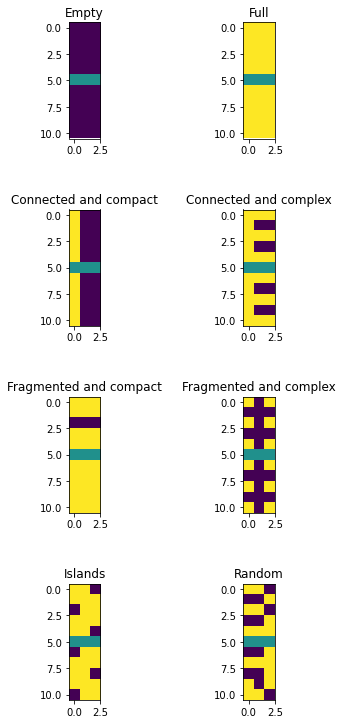

In [6]:
fig, ax = plt.subplots(4,2, figsize=(5,10))
fig.tight_layout(h_pad=5)

ax[0, 0].set_title('Empty')
ax[0, 1].set_title('Full')
ax[1, 0].set_title('Connected and compact')
ax[1, 1].set_title('Connected and complex')
ax[2, 0].set_title('Fragmented and compact')
ax[2, 1].set_title('Fragmented and complex')
ax[3, 0].set_title('Islands')
ax[3, 1].set_title('Random')


ax[0, 0].imshow(blank_ar, vmin=-1, vmax=1)
ax[0, 1].imshow(full_ar, vmin=-1, vmax=1)
ax[1, 0].imshow(line_ar, vmin=-1, vmax=1)
ax[1, 1].imshow(comb_ar, vmin=-1, vmax=1)
ax[2, 0].imshow(frag_compact_ar, vmin=-1, vmax=1)
ax[2, 1].imshow(frag_complex_ar, vmin=-1, vmax=1)
ax[3, 0].imshow(pockets_ar, vmin=-1, vmax=1)
ax[3, 1].imshow(random_ar, vmin=-1, vmax=1)


In [7]:
template_da = xr.DataArray(data=blank_ar.astype("float32"),
                          dims=["x", "y"])

#Create DataArrays
blank_da = template_da.copy()
blank_da.data = blank_ar.astype("float32")

full_da = template_da.copy()
full_da.data = full_ar.astype("float32")

line_da = template_da.copy()
line_da.data = line_ar.astype("float32")

comb_da = template_da.copy()
comb_da.data = comb_ar.astype("float32")

frag_compact_da = template_da.copy()
frag_compact_da.data = frag_compact_ar.astype("float32")

frag_complex_da = template_da.copy()
frag_complex_da.data = frag_complex_ar.astype("float32")

pockets_da = template_da.copy()
pockets_da.data = pockets_ar.astype("float32")

random_da = template_da.copy()
random_da.data = random_ar.astype("float32")


In [8]:
pockets_da

<xarray.DataArray (x: 11, y: 3)>
array([[ 1.,  1., -1.],
       [ 1.,  1.,  1.],
       [-1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1., -1.],
       [ 0.,  0.,  0.],
       [-1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1., -1.],
       [ 1.,  1.,  1.],
       [-1.,  1.,  1.]], dtype=float32)
Dimensions without coordinates: x, y

In [9]:
# Function to convert raster to vector
# ------------------------------------

def extract_raster_features(da, n_jobs=-1):
    """Generate a geodataframe from raster data by polygonizing contiguous pixels with
    the same value 
    
    Inspired by: https://pysal.org/tobler/_modules/tobler/dasymetric/raster_tools.html
    """
    
    import ast
    from rasterio import features, transform
    import multiprocessing
    from joblib import Parallel, delayed
    from shapely.geometry import shape
    
    def _chunk_dfs(geoms_to_chunk, n_jobs):
        chunk_size = geoms_to_chunk.shape[0] // n_jobs + 1
        for i in range(n_jobs):
            start = i * chunk_size
            yield geoms_to_chunk.iloc[start : start + chunk_size]
    
    def _apply_parser(df):
        return df.apply(_parse_geom)

    def _parse_geom(geom_str):
        return shape(ast.literal_eval(geom_str))

    # CRS of the DataArray
    raster_crs = da.rio.crs
    
    # Convert regions to polygons
    shapes = list(features.shapes(da.values, transform=da.rio.transform()))

    # Get number of processes for multiprocessing
    if n_jobs == -1:
            n_jobs = multiprocessing.cpu_count()
    
    res = list(zip(*shapes))
    geoms = pd.Series(res[0], name="geometry").astype(str)
    pieces = _chunk_dfs(geoms, n_jobs)
    geoms = pd.concat(
        Parallel(n_jobs=n_jobs)(delayed(_apply_parser)(i) for i in pieces))
    
    geoms = gpd.GeoSeries(geoms).buffer(0)  # we sometimes get self-intersecting rings
    vals = pd.Series(res[1], name="value")
    gdf = gpd.GeoDataFrame(vals, geometry=geoms, crs=raster_crs)
    
    return gdf

pixel_x = (frag_compact_gdf["geometry"].total_bounds[2] - 
           frag_compact_gdf["geometry"].total_bounds[0]) / 3
pixel_x

pixel_y = (frag_compact_gdf["geometry"].total_bounds[3] - 
           frag_compact_gdf["geometry"].total_bounds[1]) / 10
pixel_y

blank_gdf 
full_gdf 
line_gdf 
comb_gdf 
frag_compact_gdf 
frag_complex_gdf 
islands_gdf 
pockets_gdf 

In [10]:
# Create GeoDataFrames

arrays = [blank_da,
          full_da,
          line_da,
          comb_da,
          frag_compact_da,
          frag_complex_da,
          pockets_da,
          random_da]

gdfs = []
for i in arrays:
    gdfs.append(extract_raster_features(i))
    

In [11]:
def riparian_stats(gdfs, scenarios):


    connectivities = []
    coverages = []
    riparian_indices = []
    veg_n_features = []
    not_veg_n_features = []
    riparian_n_features = []


    for gdf in gdfs:
        
        veg_gdf = gdf.loc[gdf["value"] == 1]
        not_veg_gdf = gdf.loc[gdf["value"] == -1]
        riparian_gdf = gdf.loc[(gdf["value"] == 1) | (gdf["value"] == -1)].dissolve().explode(ignore_index=True)
        
        # Areas
        veg_area = veg_gdf['geometry'].area.sum()
        not_veg_area = not_veg_gdf['geometry'].area.sum()
        riparian_area = riparian_gdf['geometry'].area.sum()
        
        
        # Mean not veg features
        # add in a stat for the mean not veg feature size
        
        
        # Perimeters
        veg_perimeter = veg_gdf['geometry'].length.sum()
        not_veg_perimeter = not_veg_gdf['geometry'].length.sum()
        riparian_perimeter = riparian_gdf['geometry'].length.sum()   
        
        
        # n features
        veg_n_feature = len(veg_gdf)
        not_veg_n_feature = len(not_veg_gdf)
        riparian_n_feature = len(riparian_gdf)
        
        veg_n_features.append(veg_n_feature)
        not_veg_n_features.append(not_veg_n_feature)
        riparian_n_features.append(riparian_n_feature)
        

        # Coverages ------------------------------------------------------------------        
        coverage = veg_area / riparian_area

        coverages.append(coverage)
        
        # Connectivities -----------------------------------------------------------------
        try:
            connectivity = riparian_n_feature / veg_n_feature
        except ZeroDivisionError:
            connectivity = 0
        
        connectivities.append(connectivity)
        
        # Connectivity -----------------------------------------------------------------
        riparian_index = connectivity * coverage
        riparian_indices.append(riparian_index)
   
        

    df = pd.DataFrame(data = {"scenario": scenarios,
                              "connectivity": connectivities,
                              "coverage": coverages,
                              "riparian index": riparian_indices,
                              "riparian features": riparian_n_features,
                              "n veg features": veg_n_features,
                              "n not veg features": not_veg_n_features})
    
    return df

## Stats to consider adding

- mean area of not veg areas
- mean width (i.e. distance along shoreline) of not veg areas
- number of disconnections per area? per length?

In [12]:
scenarios = ["Empty",
            "Full",
            "Connected and compact",
            "Connected and complex",
            "Fragmented and compact",
            "Fragmented and complex",
            "Pockets",
            "Random"] 

stats_df = riparian_stats(gdfs=gdfs, scenarios=scenarios)

pd.set_option("display.precision", 2)
stats_df

,scenario,connectivity,coverage,riparian index,riparian features,n veg features,n not veg features
0,Empty,0.00,0.00,0.00,2,0,2
1,Full,1.00,1.00,1.00,2,2,0
2,Connected and compact,1.00,0.33,0.33,2,2,2
3,Connected and complex,1.00,0.73,0.73,2,2,4
4,Fragmented and compact,0.67,0.90,0.60,2,3,1
5,Fragmented and complex,0.17,0.40,0.07,2,12,2
6,Pockets,1.00,0.80,0.80,2,2,6
7,Random,0.33,0.60,0.20,2,6,7


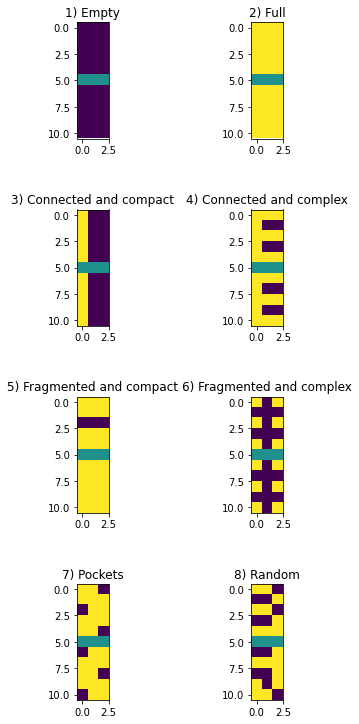

In [13]:
fig, ax = plt.subplots(4,2, figsize=(5,10))
fig.tight_layout(h_pad=5)

ax[0, 0].set_title('1) Empty')
ax[0, 1].set_title('2) Full')
ax[1, 0].set_title('3) Connected and compact')
ax[1, 1].set_title('4) Connected and complex')
ax[2, 0].set_title('5) Fragmented and compact')
ax[2, 1].set_title('6) Fragmented and complex')
ax[3, 0].set_title('7) Pockets')
ax[3, 1].set_title('8) Random')


ax[0, 0].imshow(blank_ar, vmin=-1, vmax=1)
ax[0, 1].imshow(full_ar, vmin=-1, vmax=1)
ax[1, 0].imshow(line_ar, vmin=-1, vmax=1)
ax[1, 1].imshow(comb_ar, vmin=-1, vmax=1)
ax[2, 0].imshow(frag_compact_ar, vmin=-1, vmax=1)
ax[2, 1].imshow(frag_complex_ar, vmin=-1, vmax=1)
ax[3, 0].imshow(pockets_ar, vmin=-1, vmax=1)
ax[3, 1].imshow(random_ar, vmin=-1, vmax=1)
